In [15]:
import fastmri
import h5py
import numpy as np
import sys
sys.path.append('../helpers/')
import helpers

import matplotlib
from matplotlib import pylab as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
matplotlib.rc("image", cmap="gray")

['reconstruction']

{}

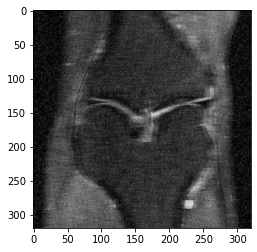

In [27]:
DATA_PATH = '../pred-recons/'
FILE_SAMPLE = DATA_PATH + 'file1000017.h5'

pred = h5py.File(FILE_SAMPLE, mode='r')
list(hf.keys())
dict(hf.attrs)
n_slice = 20
crop_size = (320, 320)

volume_recon = pred['reconstruction'][()]
sample_recon = volume_recon[n_slice]

plt.imshow(np.abs(sample_recon))

['ismrmrd_header', 'kspace', 'reconstruction_esc', 'reconstruction_rss']

{'acquisition': 'CORPDFS_FBK',
 'max': 0.00018763787991746947,
 'norm': 0.047778043935890406,
 'patient_id': 'c9c605beab46b29882f2cb33d5042b885e009f7b0abe8bc60f00a4e30cc4c465'}

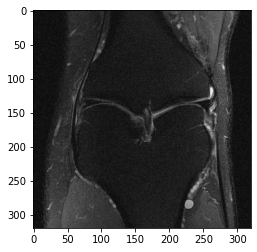

In [28]:
DATA_PATH = '../data/FastMRI/knee/singlecoil_val/'
FILE_SAMPLE = DATA_PATH + 'file1000017.h5'

ground_truth = h5py.File(FILE_SAMPLE, mode='r')
list(ground_truth.keys())
dict(ground_truth.attrs)
n_slice = 20
crop_size = (320, 320)

volume_gt = ground_truth['reconstruction_rss'][()]
fully_sampled = volume_gt[n_slice]

plt.imshow(np.abs(fully_sampled))

PSNR: 22.07873721086017
SSIM: 0.401839965798671
SNR: 10.2574102439129
MSE: 5.2369986193966345e-11


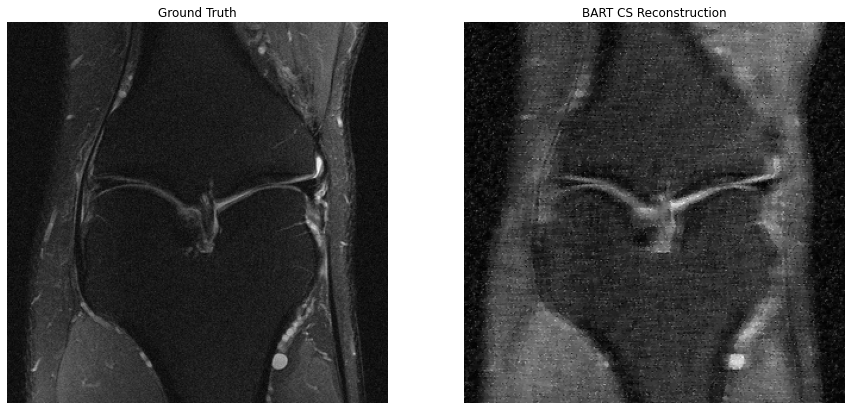

In [40]:
_ = helpers.calculate_metrics(fully_sampled, sample_recon)
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_figheight(12)
fig.set_figwidth(15)
_ = ax[0].imshow(np.abs(fully_sampled))
_ = ax[0].set_title('Ground Truth')
_ = ax[0].axis('off')
_ = ax[1].imshow(np.abs(sample_recon))
_ = ax[1].set_title('BART CS Reconstruction')
_ = ax[1].axis('off')